<a href="https://colab.research.google.com/github/Giaokeo/Giaokeo/blob/main/10_mon_an_Viet_Nam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
import math as m
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential, load_model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def plot_history(history_fine):
  f1 = history_fine.history['acc']
  val_f1 = history_fine.history['val_acc']

  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='Acc')
  plt.plot(val_f1, label='Validation Acc')
  plt.legend(loc='lower right')
  plt.title('Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

In [4]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [5]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/10_Mon_an_dac_san_VN/Training',target_size=(200,200),batch_size=3,class_mode='categorical')
validation_dataset=validation.flow_from_directory('/content/drive/MyDrive/10_Mon_an_dac_san_VN/Validation',target_size=(200,200),batch_size=3,class_mode='categorical')

Found 200 images belonging to 10 classes.
Found 114 images belonging to 10 classes.


In [6]:
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential, load_model
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(200,200,3)))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))



model.add(Flatten())
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128, activation = 'relu', kernel_initializer= 'he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_dataset,epochs=30,batch_size=128,validation_data=validation_dataset,verbose=1)

Epoch 1/30
67/67 [==============================] - 78s 991ms/step - loss: 2.4283 - accuracy: 0.1050 - val_loss: 2.3005 - val_accuracy: 0.1053
Epoch 2/30
67/67 [==============================] - 1s 19ms/step - loss: 2.3085 - accuracy: 0.1000 - val_loss: 2.2959 - val_accuracy: 0.0877
Epoch 3/30
67/67 [==============================] - 1s 20ms/step - loss: 2.2988 - accuracy: 0.1400 - val_loss: 2.2886 - val_accuracy: 0.1316
Epoch 4/30
67/67 [==============================] - 1s 19ms/step - loss: 2.2466 - accuracy: 0.1100 - val_loss: 2.1136 - val_accuracy: 0.1842
Epoch 5/30
67/67 [==============================] - 1s 20ms/step - loss: 2.1712 - accuracy: 0.1800 - val_loss: 1.9259 - val_accuracy: 0.1842
Epoch 6/30
67/67 [==============================] - 1s 19ms/step - loss: 2.0381 - accuracy: 0.1800 - val_loss: 1.8709 - val_accuracy: 0.2544
Epoch 7/30
67/67 [==============================] - 1s 19ms/step - loss: 1.9274 - accuracy: 0.2000 - val_loss: 2.0902 - val_accuracy: 0.1228
Epoch 8/30


In [7]:
dir_path='//content/drive/MyDrive/10_Mon_an_dac_san_VN/Testing'

for i in os.listdir(dir_path):
  print(i)

images (6).jpg
images (2).jpg
download.jpg
download (9).jpg
download (11).jpg
download (2).jpg
download (15).jpg
download (4).jpg
download (7).jpg
download (10).jpg


In [8]:
validation_dataset.class_indices

{'Banh_beo': 0,
 'Banh_chung': 1,
 'Banh_mi': 2,
 'Banh_xeo': 3,
 'Bun_rieu_cua': 4,
 'Cha_ca': 5,
 'Che_khuc_bach': 6,
 'Goi_cuon': 7,
 'Nem_ran': 8,
 'Pho': 9}

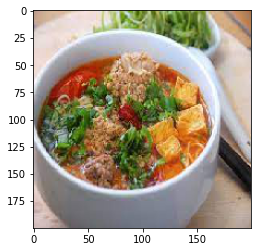

Bun_rieu_cua


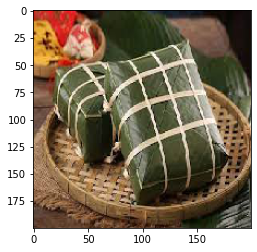

Banh_chung


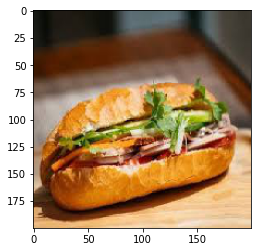

Banh_mi


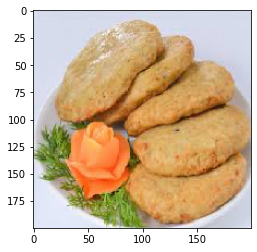

Cha_ca


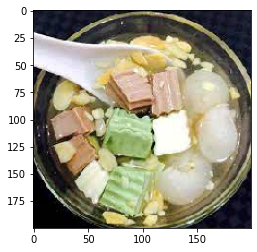

Che_khuc_bach


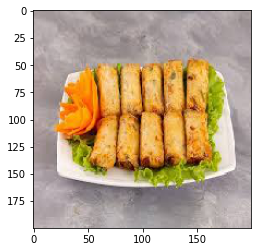

Nem_ran


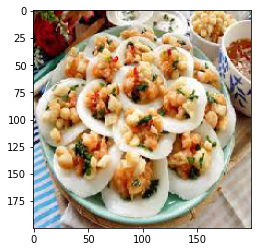

Banh_beo


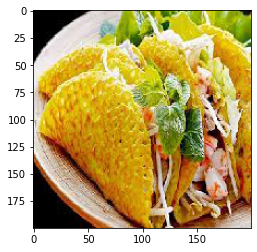

Banh_xeo


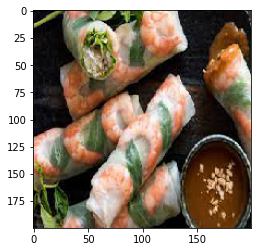

Goi_cuon


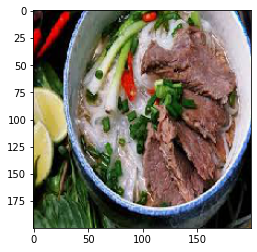

Pho


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

path = '/content/drive/MyDrive/10_Mon_an_dac_san_VN/Testing'

for i in range (10):
    img = load_img(path+'//'+str(i+1)+'.jpg',target_size=(200,200))
    plt.imshow(img)
    plt.show()

    img = img_to_array(img)
    img=np.reshape(img,(1,200,200,3))
    img = img.astype('float32')
    img = img/255
    predict =  np.argmax(model.predict(img))
    if predict==0:
      print("Banh_beo")
    elif predict==1: 
      print("Banh_chung")
    elif predict==2: 
      print("Banh_mi")
    elif predict==3: 
      print("Banh_xeo")
    elif predict==4: 
      print("Bun_rieu_cua")
    elif predict==5: 
      print("Cha_ca")
    elif predict==6: 
      print("Che_khuc_bach")
    elif predict==7: 
      print("Goi_cuon")
    elif predict==8: 
      print("Nem_ran")
    elif predict==9: 
      print("Pho")